**Importing required libraries and Reading data**

In [96]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("/content/customers_dataset.csv")

**Plotting a Histogram based on Annual Income**

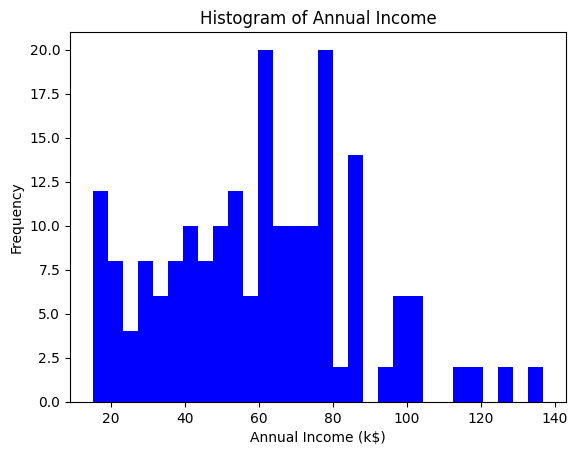

In [97]:
plt.hist(df['Annual Income (k$)'],bins = 30,color = 'blue')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency")
plt.title("Histogram of Annual Income")
plt.show()

**Plotting a Box-Plot based on Annual Income**

Text(0.5, 1.0, 'Box Plot of Annual Income')

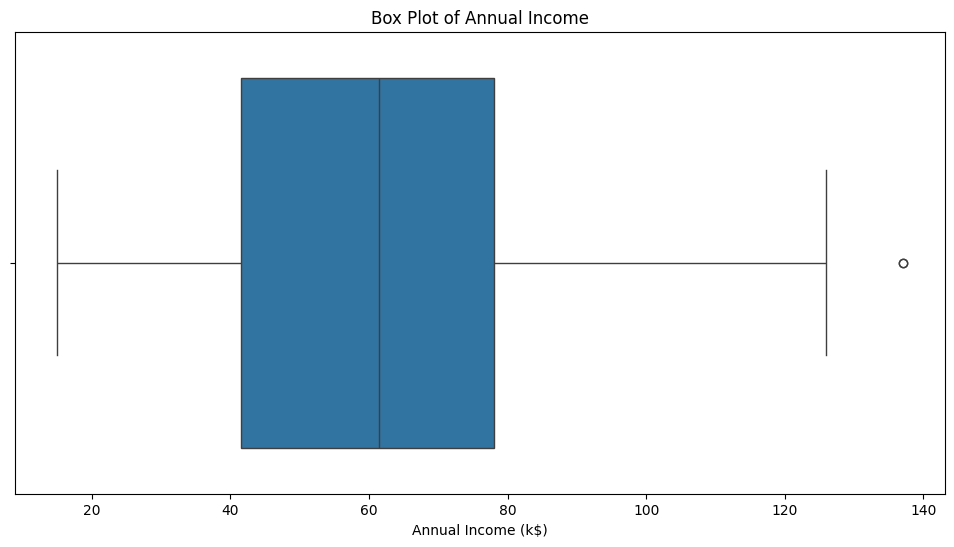

In [98]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Annual Income (k$)'])
plt.xlabel("Annual Income (k$)")
plt.title("Box Plot of Annual Income")

**Plotting a Scatter Plot based on Annual Income**

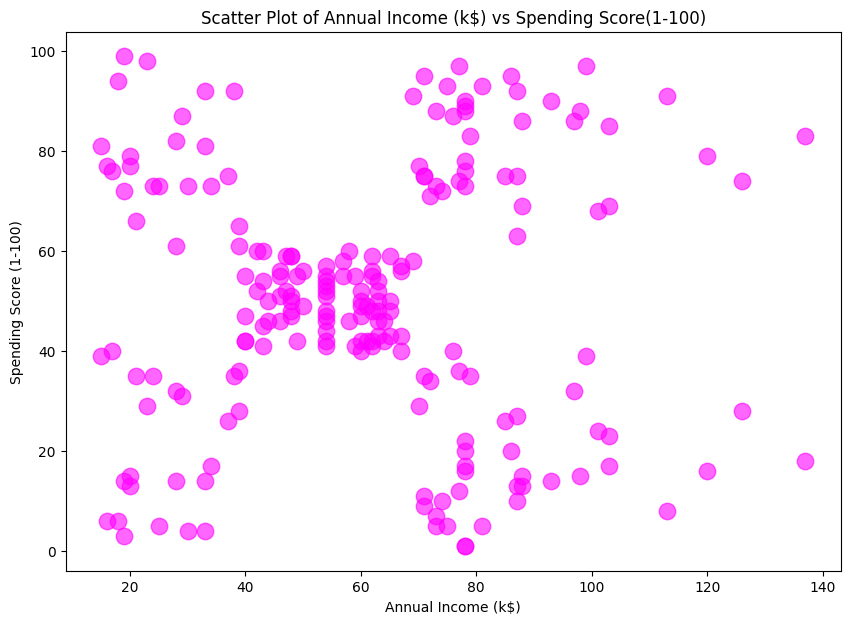

In [99]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color = "magenta",marker = "o",alpha = 0.6,s = 140)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Scatter Plot of Annual Income (k$) vs Spending Score(1-100)")
plt.show()

**Plotting a Pair Plot based on Annual Income**

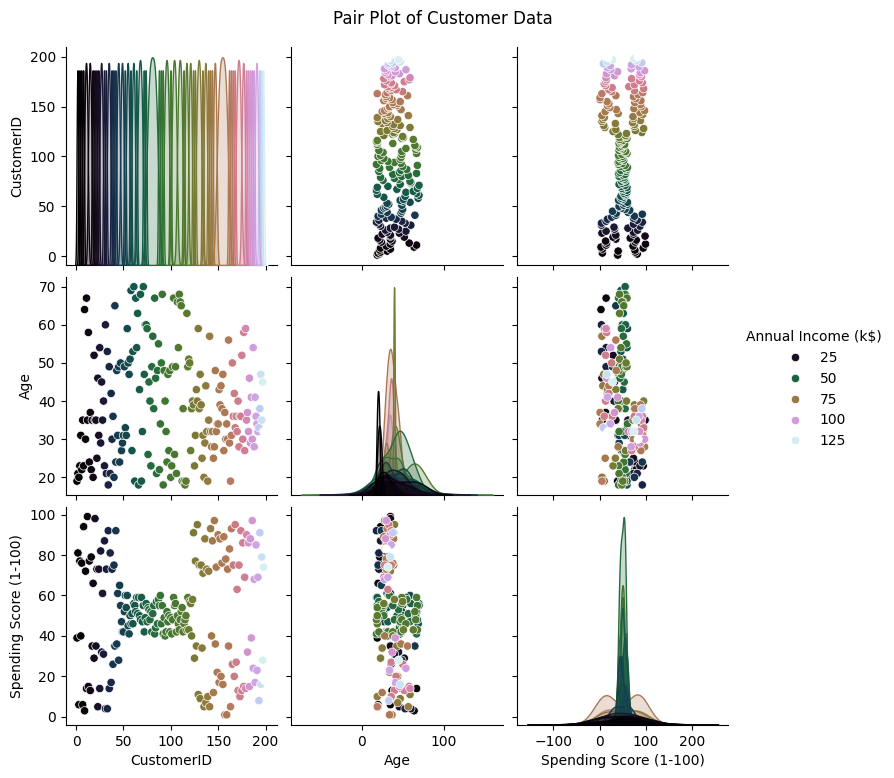

In [100]:
sns.pairplot(df,hue = 'Annual Income (k$)', palette= 'cubehelix')
plt.suptitle("Pair Plot of Customer Data",y = 1.03)
plt.show()

Separating numerical data from the data file

In [101]:
num_data = df.select_dtypes(include = 'number')
num_data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


Calculating the Skewness in each numerical data column

In [102]:
num_data.skew()

,0
CustomerID,0.000000
Age,0.485569
Annual Income (k$),0.321843
Spending Score (1-100),-0.047220


**Applying Log Transformation**

In [103]:
log_income = np.log(df['Annual Income (k$)'])
df['log_income'] = log_income
print("Annual Income data skewness before applying log tranformation:",df['Annual Income (k$)'].skew())
print("Annual Income data skewness after applying log tranformation:",df['log_income'].skew())

Annual Income data skewness before applying log tranformation: 0.3218425498619055
Annual Income data skewness after applying log tranformation: -0.7596281254451491


**Applying Square Root Transformation**

In [104]:
sqrt_income = np.sqrt(df['Annual Income (k$)'])
df['sqrt_income'] = sqrt_income
print("Annual Income data skewness before applying sqaure root transformation:",df['Annual Income (k$)'].skew())
print("Annual Income data skewness after applying sqaure root transformation:",df['sqrt_income'].skew())

Annual Income data skewness before applying sqaure root transformation: 0.3218425498619055
Annual Income data skewness after applying sqaure root transformation: -0.23028952579486217


**Scaling transformed data using Standardization Method**

In [105]:
scaler = StandardScaler()
scaled_sqrt_income = scaler.fit_transform(sqrt_income.values.reshape(-1,1))
df['scaled_sqrt_income'] = scaled_sqrt_income
x = df['scaled_sqrt_income'].mean()
y = df['scaled_sqrt_income'].std()
print("Annual Income data skewness before before standard scaling:",df['sqrt_income'].skew())
print("Annual Income data skewness after standard scaling:",df['scaled_sqrt_income'].skew())
print("Annual Income data mean after standard scaling:",x)
print("Annual Income data standard deviation after standard scaling:",y)

Annual Income data skewness before before standard scaling: -0.23028952579486217
Annual Income data skewness after standard scaling: -0.23028952579486087
Annual Income data mean after standard scaling: -4.263256414560601e-16
Annual Income data standard deviation after standard scaling: 1.0025094142341708


**Comparing the Plots of Original data, transformed data and Scaled data**

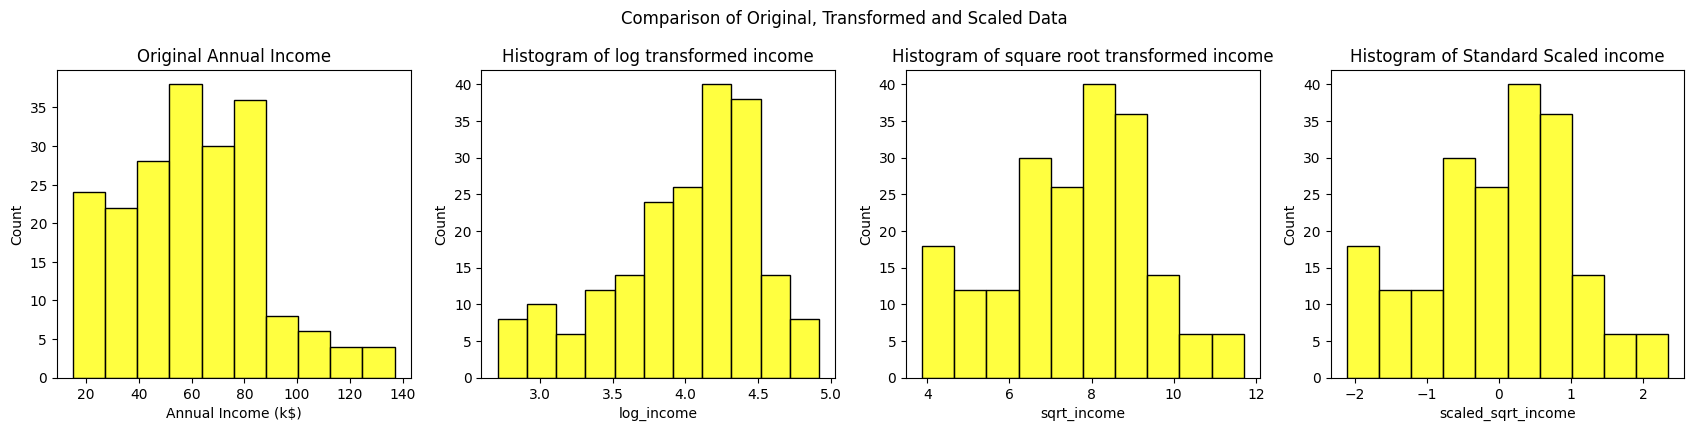

In [106]:
fig,[ax1,ax2,ax3,ax4] = plt.subplots(nrows = 1,ncols = 4,figsize = (21,4))
sns.histplot(df['Annual Income (k$)'],ax = ax1,color = 'yellow')
sns.histplot(df['log_income'],ax = ax2,color = 'yellow')
sns.histplot(df['sqrt_income'],ax = ax3,color = 'yellow')
sns.histplot(df['scaled_sqrt_income'],ax = ax4,color = 'yellow')
ax1.set_title("Original Annual Income")
ax2.set_title("Histogram of log transformed income")
ax3.set_title("Histogram of square root transformed income")
ax4.set_title("Histogram of Standard Scaled income")
plt.suptitle("Comparison of Original, Transformed and Scaled Data",y = 1.03)
plt.show()

# Clustering the Dataset

**Using the elbow method to find suitable k value**

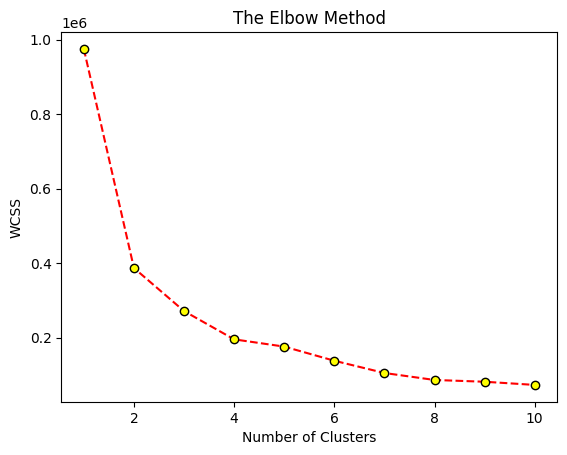

In [107]:
wcss = []
for k in range(1,11):
  wcss.append(KMeans(n_clusters = k,init = 'k-means++',random_state = 40).fit(num_data).inertia_)
plt.plot(range(1,11),wcss,marker = 'o',linestyle = '--',color = 'red',mfc = 'yellow',mec = 'k')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

**Clustering Using K means**

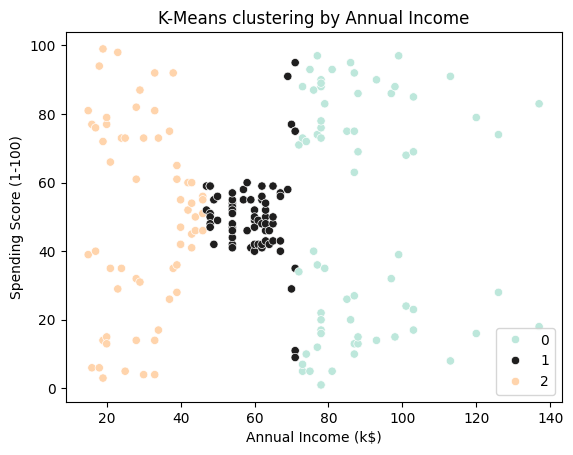

In [108]:
X = num_data.values
kmeans = KMeans(n_clusters = 3,n_init = 100,random_state = 0).fit(X)
df['cluster'] = kmeans.fit_predict(X)
sns.scatterplot(data = df,x= 'Annual Income (k$)',y ='Spending Score (1-100)' ,hue = 'cluster',palette = 'icefire')
plt.title("K-Means clustering by Annual Income")
plt.legend()
plt.show()

**Diplaying the Cluster Centres**

In [109]:
centre = kmeans.cluster_centers_
print(centre)

[[166.5         36.04411765  88.91176471  50.20588235]
 [ 97.5         42.81428571  59.54285714  50.51428571]
 [ 31.5         37.4516129   30.61290323  49.83870968]]


 **Generating new CSV File**

In [110]:
df.to_csv("updated_data.csv",index = False)
print(df.to_string)

<bound method DataFrame.to_string of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     log_income  sqrt_income  scaled_sqrt_income  